In [16]:
#import libraries
import pandas as pd
import seaborn as sns
import collections
#import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load data

In [2]:
#load file- work computer
#C:\Users\liz\Desktop\course-materials-2020\fMRI_HCP
#df = pd.read_csv(r'C:\Users\liz\Desktop\course-materials-2020\fMRI_HCP\HCP_behavioralData.csv',header = 1)
df = pd.read_csv("/mnt/c/Users/liz/Desktop/course-materials-2020/fMRI_HCP/HCP_behavioralData.csv")

## First look at the data

In [3]:
#look at 10 first rows
df.head(10)
#look at colums (name of variables)
df.columns
#size of data
df.shape

df.describe()

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88
5,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,6.0,122.25,111.41,0.0,38.6,123.80,123.31,1.80,0.0,1.80
6,101107,S500,Q06,M,22-25,True,2,2,4,100.0,...,6.8,108.79,97.19,1.0,50.1,134.65,131.38,1.84,0.0,1.84
7,101208,S1200,Q12,F,31-35,False,0,0,0,0.0,...,4.4,101.12,87.11,1.0,50.1,105.57,102.32,1.92,0.0,1.92
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,5.2,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,6.8,122.25,111.41,3.0,50.1,73.86,71.78,1.80,0.0,1.80


Index(['Subject', 'Release', 'Acquisition', 'Gender', 'Age',
       '3T_Full_MR_Compl', 'T1_Count', 'T2_Count', '3T_RS-fMRI_Count',
       '3T_RS-fMRI_PctCompl',
       ...
       'Noise_Comp', 'Odor_Unadj', 'Odor_AgeAdj', 'PainIntens_RawScore',
       'PainInterf_Tscore', 'Taste_Unadj', 'Taste_AgeAdj', 'Mars_Log_Score',
       'Mars_Errs', 'Mars_Final'],
      dtype='object', length=582)

(1206, 582)

,Subject,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_tMRI_PctCompl,fMRI_WM_PctCompl,fMRI_Gamb_PctCompl,fMRI_Mot_PctCompl,fMRI_Lang_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,...,1196.000000,1204.000000,1204.000000,1201.000000,1205.000000,1200.000000,1200.000000,1198.000000,1195.000000,1195.000000
mean,374551.585406,1.478441,1.400498,3.509950,87.213267,88.219569,89.718076,89.852736,89.631675,87.027114,...,4.404682,110.421321,97.727500,1.449625,45.847718,95.166983,93.998533,1.845467,0.581590,1.822251
std,272686.898230,0.635688,0.628216,1.215181,31.027886,29.942161,30.384864,30.163559,30.492092,33.566043,...,1.513823,9.107963,11.273251,1.783069,7.679288,14.583412,14.837851,0.541393,0.973172,0.542893
min,100004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.400000,82.740000,59.860000,0.000000,38.600000,56.350000,59.500000,1.560000,0.000000,1.080000
25%,154254.250000,1.000000,1.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,3.600000,101.120000,87.110000,0.000000,38.600000,84.070000,83.220000,1.800000,0.000000,1.760000
50%,212166.500000,2.000000,1.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,4.400000,108.790000,98.040000,1.000000,45.900000,95.360000,94.970000,1.800000,0.000000,1.800000
75%,586310.500000,2.000000,2.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,5.200000,122.250000,110.450000,2.000000,52.200000,105.570000,102.920000,1.880000,1.000000,1.840000
max,996782.000000,2.000000,2.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,14.000000,122.250000,111.410000,10.000000,75.300000,134.650000,131.380000,15.000000,17.000000,15.000000


## Detect missing values in the data

In [4]:
#Detect missing values in the data
#How many Nulls for each field?
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
type(null_columns)

dMRI_3T_ReconVrs         141
fMRI_3T_ReconVrs         108
7T_fMRI_Mov_Vrs         1022
QC_Issue                1049
MRsession_Scanner_3T      93
                        ... 
Taste_Unadj                6
Taste_AgeAdj               6
Mars_Log_Score             8
Mars_Errs                 11
Mars_Final                11
Length: 470, dtype: int64

pandas.core.indexes.base.Index

## Exclude missing values from the data

In [5]:
#Percent of missing values for each field
print (df.isnull().mean())
#Keep only the fields where there is less than 25% of missing values
df = df.loc[:, df.isnull().mean() < .25]
#The remained fields
print(df.columns)
#df.head(10)
df.shape

#Delete rows with missing values
#percent of 'normal' values for each row
df.notnull().mean(axis=1)
#Keep only the rows where there are no missing values 
df = df.loc[df.notnull().mean(axis=1) == 1, :]
df.head(10)
df.shape

Subject           0.000000
Release           0.000000
Acquisition       0.000000
Gender            0.000000
Age               0.000000
                    ...   
Taste_Unadj       0.004975
Taste_AgeAdj      0.004975
Mars_Log_Score    0.006633
Mars_Errs         0.009121
Mars_Final        0.009121
Length: 582, dtype: float64
Index(['Subject', 'Release', 'Acquisition', 'Gender', 'Age',
       '3T_Full_MR_Compl', 'T1_Count', 'T2_Count', '3T_RS-fMRI_Count',
       '3T_RS-fMRI_PctCompl',
       ...
       'Noise_Comp', 'Odor_Unadj', 'Odor_AgeAdj', 'PainIntens_RawScore',
       'PainInterf_Tscore', 'Taste_Unadj', 'Taste_AgeAdj', 'Mars_Log_Score',
       'Mars_Errs', 'Mars_Final'],
      dtype='object', length=567)


(1206, 567)

0       0.455026
1       1.000000
2       1.000000
3       1.000000
4       0.994709
          ...   
1201    1.000000
1202    0.994709
1203    1.000000
1204    1.000000
1205    1.000000
Length: 1206, dtype: float64

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,5.2,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,6.8,122.25,111.41,3.0,50.1,73.86,71.78,1.80,0.0,1.80
11,101915,Q3,Q04,F,31-35,True,2,2,4,100.0,...,4.4,96.87,77.61,0.0,38.6,112.11,111.70,1.84,1.0,1.80
12,102008,S500,Q06,M,22-25,False,1,1,4,100.0,...,6.0,122.25,110.45,0.0,50.1,67.48,65.31,1.80,0.0,1.80
15,102513,S900,Q10,M,26-30,True,2,2,4,100.0,...,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92
16,102614,S1200,Q12,M,22-25,True,2,2,4,100.0,...,3.6,96.87,77.12,0.0,38.6,79.67,78.91,1.80,1.0,1.76
17,102715,S1200,Q12,M,26-30,True,2,2,4,100.0,...,5.2,93.38,69.88,1.0,38.6,86.03,86.60,1.84,0.0,1.84


(845, 567)

In [6]:
#Delete fields with only one unique value
#Number of unique values for each field
df.nunique()
#Keep only the fields where there is more than one unique value
df = df.loc[:, df.nunique() > 1]
#The remained fields
print(df.columns)
df.head(10)
df.shape

Subject           845
Release             7
Acquisition        13
Gender              2
Age                 4
                 ... 
Taste_Unadj        95
Taste_AgeAdj      178
Mars_Log_Score     11
Mars_Errs           7
Mars_Final         13
Length: 567, dtype: int64

Index(['Subject', 'Release', 'Acquisition', 'Gender', 'Age',
       '3T_Full_MR_Compl', 'T1_Count', 'T2_Count', '3T_RS-fMRI_Count',
       '3T_RS-fMRI_PctCompl',
       ...
       'Noise_Comp', 'Odor_Unadj', 'Odor_AgeAdj', 'PainIntens_RawScore',
       'PainInterf_Tscore', 'Taste_Unadj', 'Taste_AgeAdj', 'Mars_Log_Score',
       'Mars_Errs', 'Mars_Final'],
      dtype='object', length=544)


,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,5.2,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,6.8,122.25,111.41,3.0,50.1,73.86,71.78,1.80,0.0,1.80
11,101915,Q3,Q04,F,31-35,True,2,2,4,100.0,...,4.4,96.87,77.61,0.0,38.6,112.11,111.70,1.84,1.0,1.80
12,102008,S500,Q06,M,22-25,False,1,1,4,100.0,...,6.0,122.25,110.45,0.0,50.1,67.48,65.31,1.80,0.0,1.80
15,102513,S900,Q10,M,26-30,True,2,2,4,100.0,...,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92
16,102614,S1200,Q12,M,22-25,True,2,2,4,100.0,...,3.6,96.87,77.12,0.0,38.6,79.67,78.91,1.80,1.0,1.76
17,102715,S1200,Q12,M,26-30,True,2,2,4,100.0,...,5.2,93.38,69.88,1.0,38.6,86.03,86.60,1.84,0.0,1.84


(845, 544)

In [14]:
#Age
df['Age'].unique

<bound method Series.unique of 1       26-30
2       26-30
3       31-35
8       26-30
9       26-30
        ...  
1199    26-30
1201    31-35
1203    26-30
1204    22-25
1205    26-30
Name: Age, Length: 844, dtype: object>

## Perceptual task - Mars contrast test

count    845.000000
mean       1.815302
std        0.458903
min        1.080000
25%        1.760000
50%        1.800000
75%        1.840000
max       15.000000
Name: Mars_Final, dtype: float64

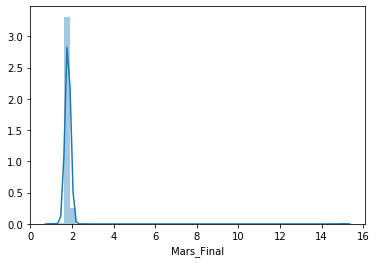

In [9]:
df['Mars_Final'].describe()
#print("Overall fully paid rate: {0:.3f}".format(y_train.mean()))
#loan amoubt distribution
sns.distplot(df['Mars_Final'])
#sns.distplot(df['Age'])

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,5.2,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,6.8,122.25,111.41,3.0,50.1,73.86,71.78,1.80,0.0,1.80
11,101915,Q3,Q04,F,31-35,True,2,2,4,100.0,...,4.4,96.87,77.61,0.0,38.6,112.11,111.70,1.84,1.0,1.80
12,102008,S500,Q06,M,22-25,False,1,1,4,100.0,...,6.0,122.25,110.45,0.0,50.1,67.48,65.31,1.80,0.0,1.80
15,102513,S900,Q10,M,26-30,True,2,2,4,100.0,...,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92
16,102614,S1200,Q12,M,22-25,True,2,2,4,100.0,...,3.6,96.87,77.12,0.0,38.6,79.67,78.91,1.80,1.0,1.76
17,102715,S1200,Q12,M,26-30,True,2,2,4,100.0,...,5.2,93.38,69.88,1.0,38.6,86.03,86.60,1.84,0.0,1.84


(844, 544)

count    844.000000
mean       1.799680
std        0.066229
min        1.080000
25%        1.760000
50%        1.800000
75%        1.840000
max        1.920000
Name: Mars_Final, dtype: float64

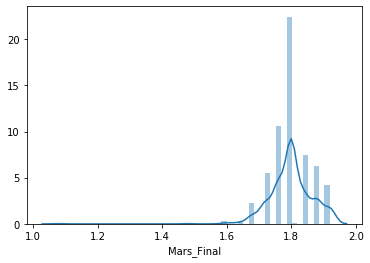

In [12]:
#Delete fields with only one unique value
#Number of unique values for each field
#df.nunique()
#Keep only the fields where there is more than one unique value
df = df.drop(df[df.Mars_Final > 2].index)
#The remained fields
#print(df.columns)
df.head(10)
df.shape

df['Mars_Final'].describe()
#print("Overall fully paid rate: {0:.3f}".format(y_train.mean()))
#loan amoubt distribution
sns.distplot(df['Mars_Final'])
#sns.distplot(df['Age'])

## Value-based task - delay discounting

count    844.000000
mean       0.514184
std        0.281555
min        0.015625
25%        0.291276
50%        0.498763
75%        0.768360
max        0.984375
Name: DDisc_AUC_40K, dtype: float64

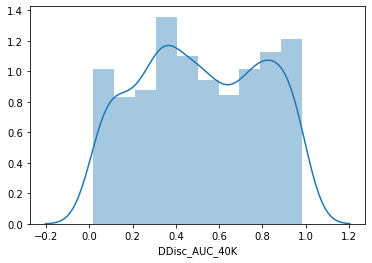

In [18]:
df['DDisc_AUC_40K'].describe()
#print("Overall fully paid rate: {0:.3f}".format(y_train.mean()))
#loan amoubt distribution
sns.distplot(df['DDisc_AUC_40K'])
#sns.distplot(df['Age'])

In [20]:
#correlation
x = df['DDisc_AUC_200']
y = df['DDisc_AUC_40K']
sc.stats.pearsonr(x, y)

(0.6686996461841546, 1.7697872738088553e-110)

count    844.000000
mean      50.710308
std        8.884690
min       20.800000
25%       45.375000
50%       50.400000
75%       56.425000
max       66.500000
Name: Friendship_Unadj, dtype: float64

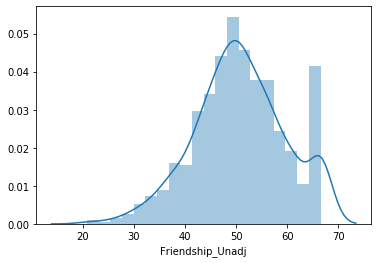

In [24]:
df['Friendship_Unadj'].describe()
#print("Overall fully paid rate: {0:.3f}".format(y_train.mean()))
#loan amoubt distribution
sns.distplot(df['Friendship_Unadj'])
#sns.distplot(df['Age'])

In [27]:
#correlation
x = df['Flanker_AgeAdj']
y = df['Mars_Final']
sc.stats.pearsonr(x, y)

(-0.048287719536613885, 0.1610413436314303)

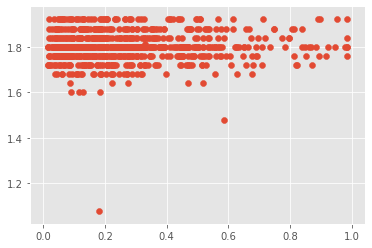

In [43]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['DDisc_AUC_200']
y = df['Mars_Final']

plt.scatter(x, y)
plt.show()

In [41]:
# apply log(x+1) element-wise to a subset of columns
Mars_log = df['Mars_Final'].apply(np.log)

#df_log = df[to_log].applymap(lambda x: np.log(x+1))

# rename columns
#df_log.columns = 'log_' + df_log.columns

# shift the index
#df_log.index = df_log.index + 1

#df.columns